In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=sns.load_dataset('penguins')
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### DataFrame llamado penguin que contenga las columnas species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g y sex.

In [3]:


data = data.rename(columns={'bill_length_mm': 'culmen_length_mm', 'bill_depth_mm': 'culmen_depth_mm'})
df =pd.DataFrame(data=data)

In [4]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


###  Sustituya los valores nulos de cada variable cuantitativa por el valor promedio de dicha variable según su especie. ◦ Muestre el análisis descriptivo de las variables cuantitativas.

In [5]:

variables_cuantitativas = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Sustituir los valores nulos por el promedio según la especie
agrupacion_species = variables_cuantitativas.groupby(data['species'])
variables_cuantitativas = agrupacion_species.transform(lambda x: x.fillna(x.mean()))
df = pd.concat([data.drop(columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']), variables_cuantitativas], axis=1)


# Mostrar el análisis descriptivo de las variables cuantitativas
print(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        344.000000       344.000000         344.000000   344.000000
mean          43.917431        17.148339         200.930641  4202.839182
std            5.454118         1.973561          14.060613   801.461347
min           32.100000        13.100000         172.000000  2700.000000
25%           39.200000        15.575000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.250000  4756.250000
max           59.600000        21.500000         231.000000  6300.000000


In [6]:
df

,species,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,Male,39.100000,18.700000,181.000000,3750.000000
1,Adelie,Torgersen,Female,39.500000,17.400000,186.000000,3800.000000
2,Adelie,Torgersen,Female,40.300000,18.000000,195.000000,3250.000000
3,Adelie,Torgersen,NaN,38.791391,18.346358,189.953642,3700.662252
4,Adelie,Torgersen,Female,36.700000,19.300000,193.000000,3450.000000
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,47.504878,14.982114,217.186992,5076.016260
340,Gentoo,Biscoe,Female,46.800000,14.300000,215.000000,4850.000000
341,Gentoo,Biscoe,Male,50.400000,15.700000,222.000000,5750.000000
342,Gentoo,Biscoe,Female,45.200000,14.800000,212.000000,5200.000000


### Realice un conteo por especie y elabore un gráfico de barras para mostrar dicha distribución.

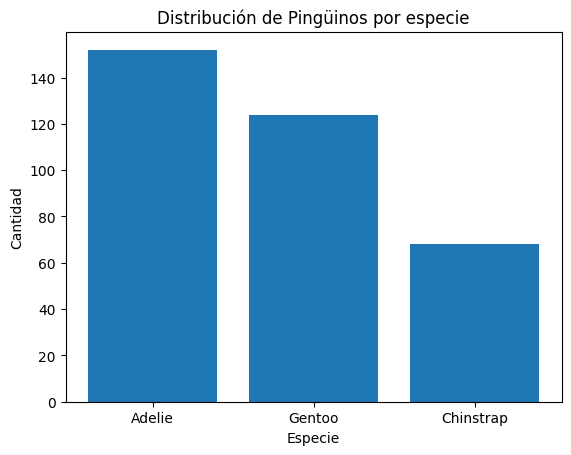

In [7]:

numero_por_specie = data['species'].value_counts()


plt.bar(numero_por_specie.index, numero_por_specie.values)
plt.title('Distribución de Pingüinos por especie')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

###  Elabore un grafico box plot para las variables culmen_length_mm, culmen_depth_mm, flipper_length_mm y agregue una interpretación.

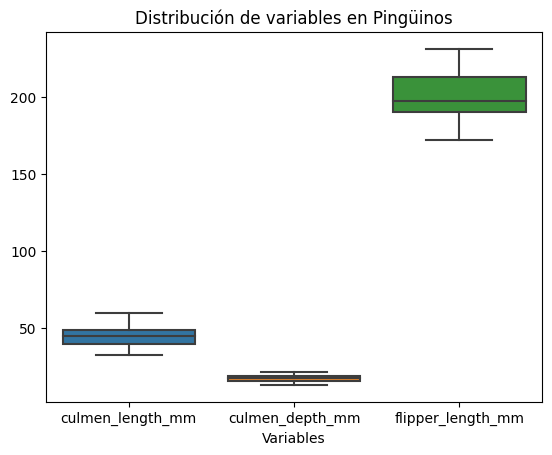

In [8]:

variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
databox = data[variables]

# Crear el gráfico box plot
sns.boxplot(data=databox)
plt.title('Distribución de variables en Pingüinos')
plt.xlabel('Variables')
plt.show()

### Realice un mapa de calor, matriz de correlación y gráfico de puntos para establecer la relación entre las variables y determinar los mejores predictores para la especie de pingüino. Agregue una interpretación de los resultados.

C:\Users\danie\AppData\Local\Temp\ipykernel_8748\3805673340.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pinguinos.corr()


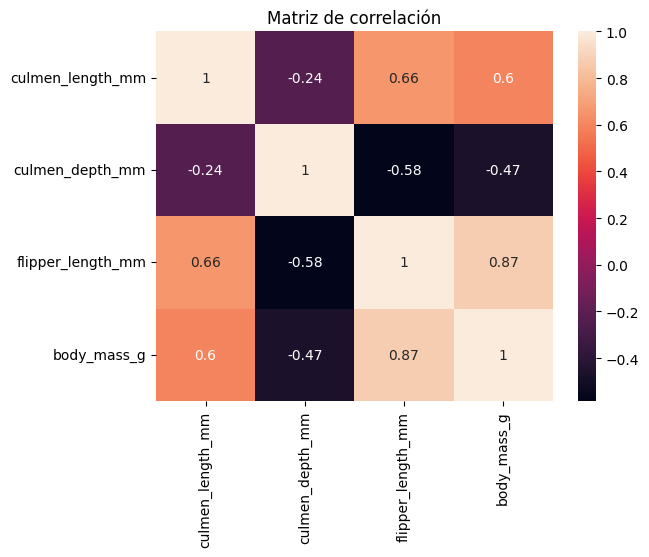

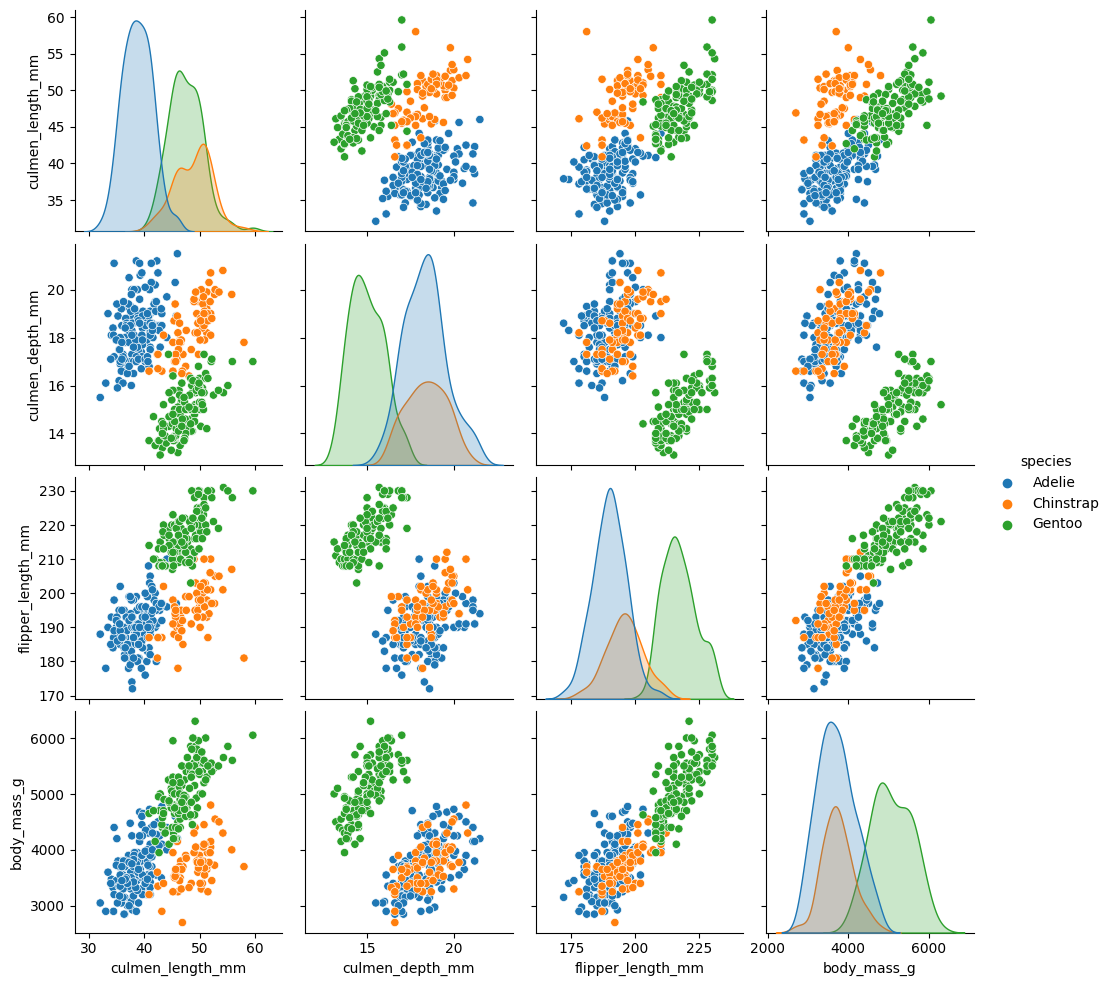

In [9]:
# Seleccionar las variables de interés
variables = ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
pinguinos = data[variables]

# Crear la matriz de correlación
corr = pinguinos.corr()

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True)
plt.title('Matriz de correlación')
plt.show()

# Crear el gráfico de puntos
sns.pairplot(data, hue='species')
plt.show()

### Teniendo en cuenta los cálculos anteriores, realice una segmentación para la clasificación de pingüinos con su respectivo gráfico 3D e incluya un análisis contrastando el resultado del segmentador con sus predicciones a partir de los elementos de correlación elaborados en los incisos anteriores.

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\danie\AppData\Local\Temp\ipykernel_8748\1800625140.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins['cluster'] = kmeans.labels_


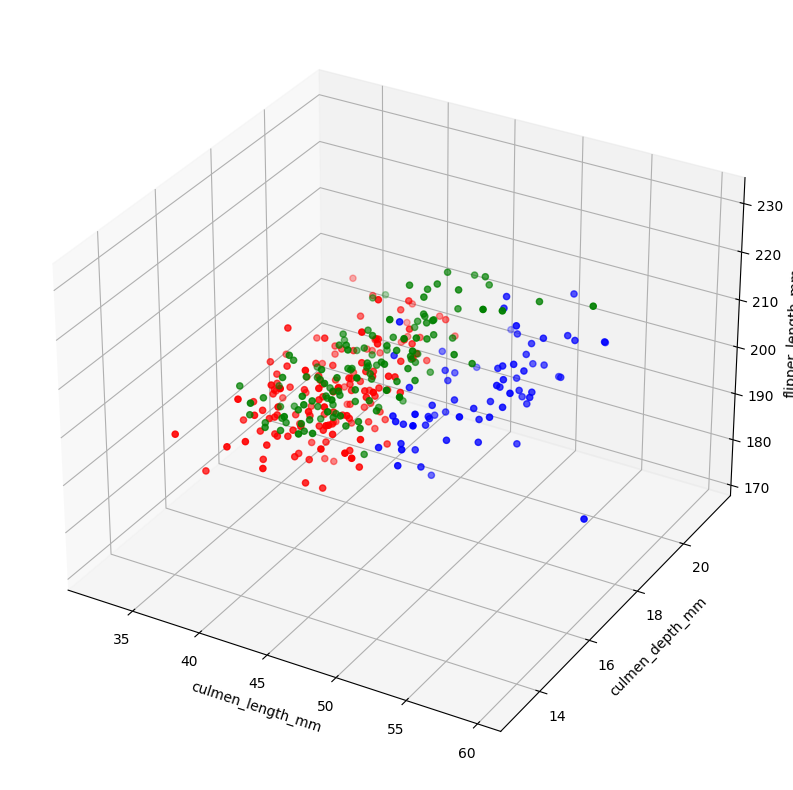

In [23]:

penguins = df[['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]



# Seleccionar las variables más correlacionadas con la especie
variables = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(penguins[variables])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
penguins['cluster'] = kmeans.labels_

# Gráfico 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster = penguins[penguins['cluster'] == i]
    ax.scatter(cluster['culmen_length_mm'], cluster['culmen_depth_mm'], cluster['flipper_length_mm'], c=colors[i])
ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('culmen_depth_mm')
ax.set_zlabel('flipper_length_mm')
plt.show();



In [55]:
import pandas as pd

df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [57]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features].values
y = df['species'].values


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [60]:
y_pred = dt.predict(X_test)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


[Text(0.640625, 0.9375, 'flipper_length_mm <= 206.5\ngini = 0.64\nsamples = 266\nvalue = [115, 55, 96]\nclass = Adelie'),
 Text(0.46875, 0.8125, 'culmen_length_mm <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113, 50, 1]\nclass = Adelie'),
 Text(0.3125, 0.6875, 'culmen_length_mm <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]\nclass = Adelie'),
 Text(0.1875, 0.5625, 'culmen_depth_mm <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]\nclass = Adelie'),
 Text(0.125, 0.4375, 'culmen_length_mm <= 39.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]\nclass = Adelie'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Gentoo'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]\nclass = Adelie'),
 Text(0.4375, 0.5625, 'flipper_length_mm <= 189.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]\nclass = Adelie'),
 Text(0.375, 0.4375, 'gini = 0.0\nsamples 

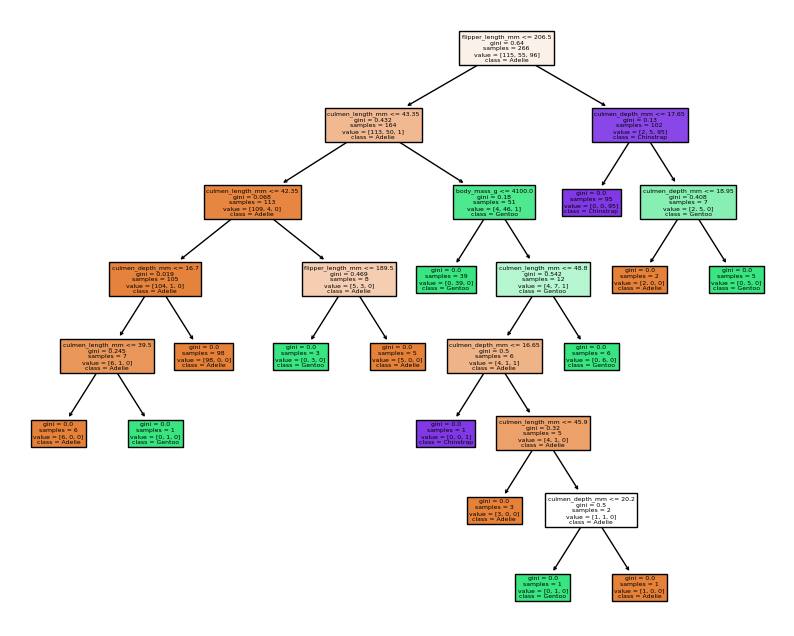

In [49]:
plt.figure(figsize=(10,8))
plot_tree(dt,feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],class_names=['Adelie','Gentoo','Chinstrap'],filled=True)